In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Restaurant%20Food%20Cost/Data_Train.xlsx')

In [3]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
df.shape

(12690, 9)

In [5]:
df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [6]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [7]:
df['CITY'].fillna(df['CITY'].mode()[0], inplace = True)
df['LOCALITY'].fillna(df['LOCALITY'].mode()[0], inplace = True)
df['RATING'].fillna(df['RATING'].mode()[0], inplace = True)
df['VOTES'].fillna(df['VOTES'].mode()[0], inplace = True)

In [8]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [9]:
df.nunique()

TITLE              113
RESTAURANT_ID    11892
CUISINES          4155
TIME              2689
CITY               359
LOCALITY          1416
RATING              32
VOTES             1847
COST                86
dtype: int64

In [10]:
df.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


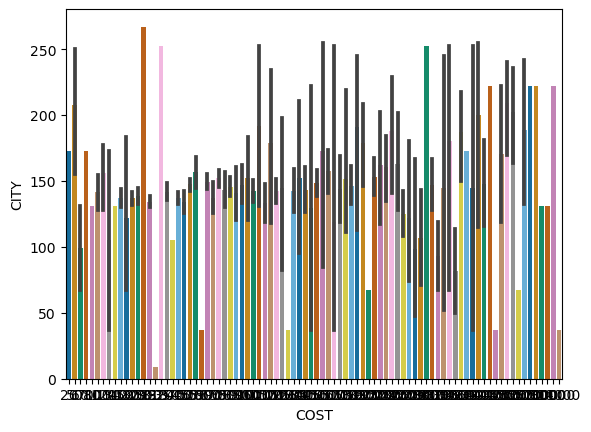

In [16]:
sns.barplot(x='COST',y='CITY',data=df,palette='colorblind')
plt.show()

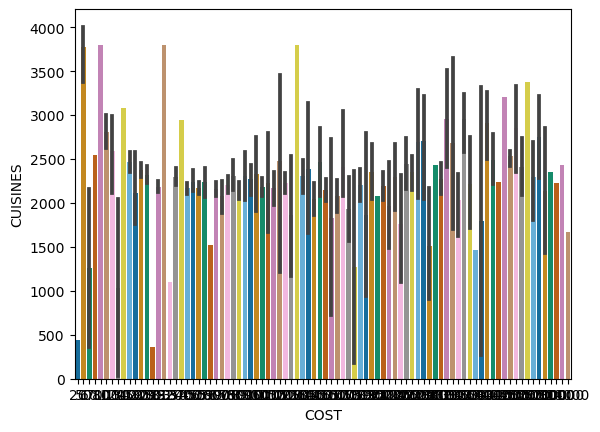

In [17]:
sns.barplot(x='COST',y='CUISINES',data=df,palette='colorblind')
plt.show()

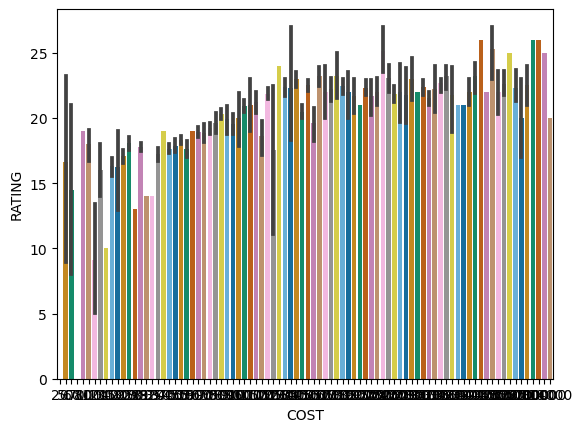

In [18]:
sns.barplot(x='COST',y='RATING',data=df,palette='colorblind')
plt.show()

In [19]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31.0,9438,2627.0,739.0,320.0,285.0,17.0,1278.0,1200
1,33.0,13198,289.0,1885.0,67.0,1046.0,23.0,950.0,1500
2,31.0,10915,2976.0,661.0,67.0,1101.0,19.0,712.0,800
3,95.0,6346,4130.0,275.0,222.0,136.0,22.0,787.0,800
4,50.0,15387,1766.0,615.0,222.0,620.0,19.0,470.0,300
...,...,...,...,...,...,...,...,...,...
12685,95.0,13228,2934.0,1144.0,131.0,342.0,19.0,1349.0,500
12686,33.0,9686,2143.0,1177.0,222.0,133.0,24.0,191.0,1800
12687,71.0,11133,2088.0,1137.0,239.0,1342.0,21.0,1428.0,1300
12688,31.0,6134,3506.0,1837.0,67.0,631.0,16.0,996.0,400


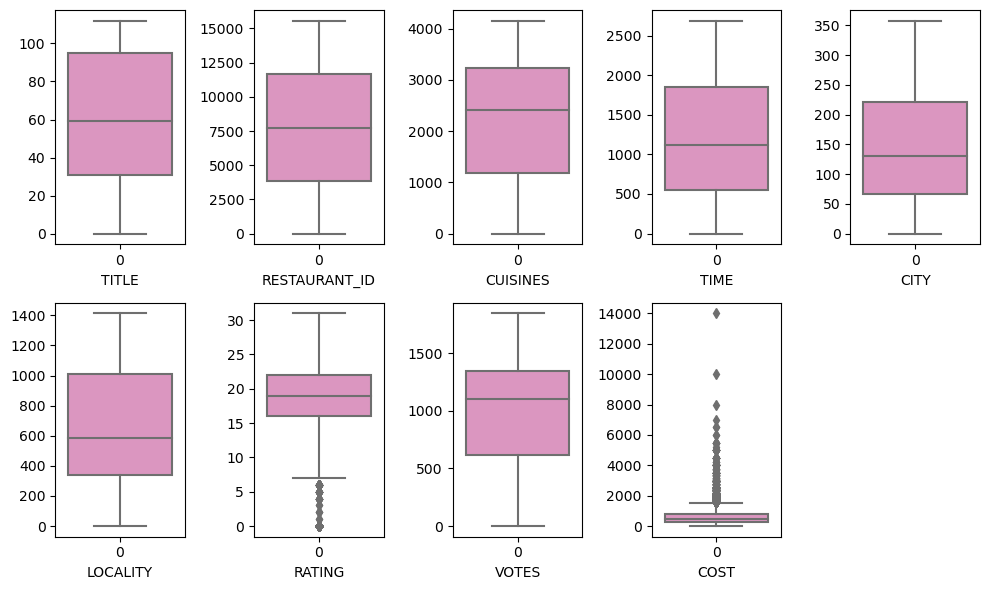

In [20]:
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for c in df.columns:
    if plotnumber <= 10:
        x=plt.subplot(2,5,plotnumber)
        sns.boxplot(df[c], palette = "Set2_r")
        plt.xlabel(c, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

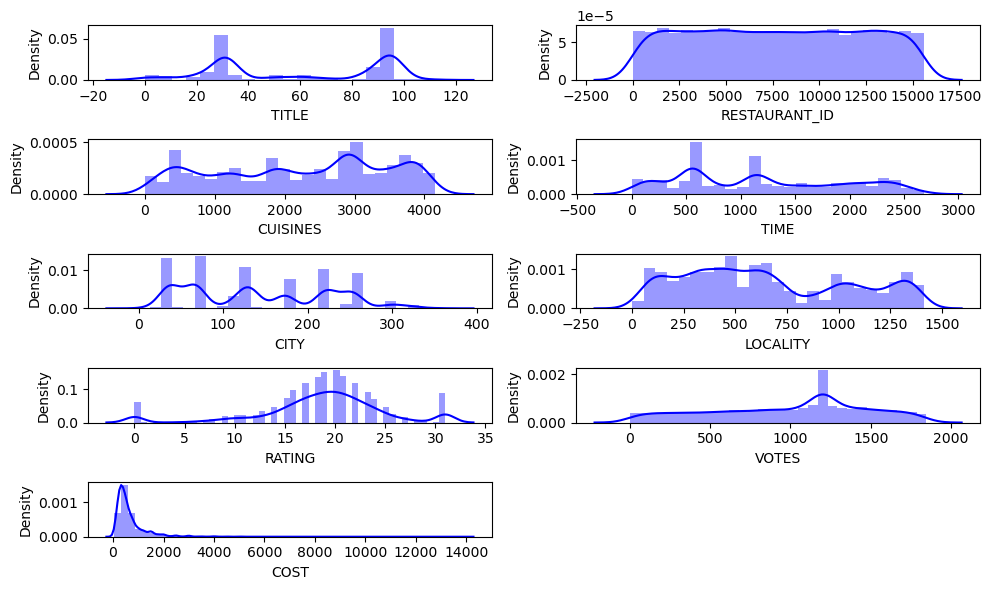

In [21]:
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for c in df.columns:
    if plotnumber <= 10:
        x=plt.subplot(5,2,plotnumber)
        sns.distplot(df[c],color = "b")
        plt.xlabel(c, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [22]:
df.skew()

TITLE           -0.069803
RESTAURANT_ID    0.006947
CUISINES        -0.218782
TIME             0.306186
CITY             0.266332
LOCALITY         0.352317
RATING          -0.803390
VOTES           -0.316806
COST             3.978801
dtype: float64

In [23]:
df['COST']=np.cbrt(df['COST'])

In [24]:
df.skew()

TITLE           -0.069803
RESTAURANT_ID    0.006947
CUISINES        -0.218782
TIME             0.306186
CITY             0.266332
LOCALITY         0.352317
RATING          -0.803390
VOTES           -0.316806
COST             1.172684
dtype: float64

In [25]:
df['COST']=np.sqrt(df['COST'])

In [26]:
df.skew()

TITLE           -0.069803
RESTAURANT_ID    0.006947
CUISINES        -0.218782
TIME             0.306186
CITY             0.266332
LOCALITY         0.352317
RATING          -0.803390
VOTES           -0.316806
COST             0.765655
dtype: float64

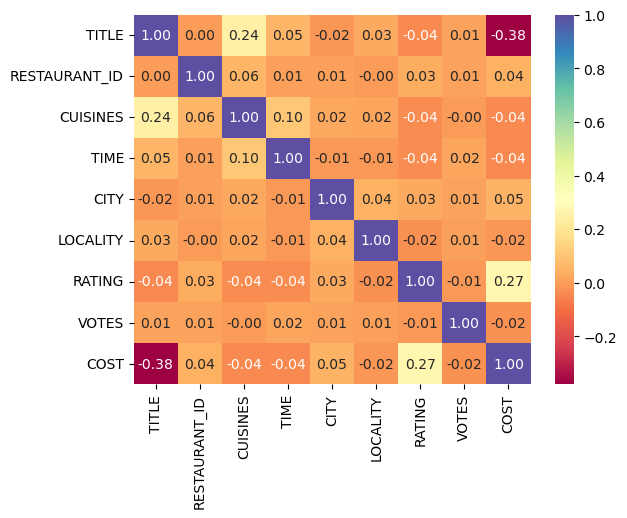

In [27]:
corr = df.corr()
sns.heatmap(corr,annot=True,fmt='0.2f',cmap='Spectral')
plt.show()

In [28]:
corr['COST'].sort_values(ascending = False)

COST             1.000000
RATING           0.268283
CITY             0.047921
RESTAURANT_ID    0.044940
LOCALITY        -0.016570
VOTES           -0.024871
TIME            -0.041752
CUISINES        -0.042972
TITLE           -0.378600
Name: COST, dtype: float64

In [29]:
x = df.drop('COST', axis =1)
y = df['COST']

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,-0.868887,0.372692,0.325408,-0.584658,2.117762,-0.920549,-0.290547,0.593884
1,-0.807839,1.207377,-1.616381,0.934369,-0.897082,0.986239,0.680153,-0.085891
2,-0.868887,0.700572,0.615265,-0.688048,-0.897082,1.124048,0.033020,-0.579143
3,1.084647,-0.313702,1.573701,-1.199692,0.949957,-1.293888,0.518369,-0.423707
4,-0.288931,1.693314,-0.389682,-0.749021,0.949957,-0.081161,0.033020,-1.080685
...,...,...,...,...,...,...,...,...
12685,1.084647,1.214036,0.580382,-0.047829,-0.134433,-0.777728,0.033020,0.741031
12686,-0.807839,0.427746,-0.076570,-0.004088,0.949957,-1.301405,0.841936,-1.658909
12687,0.352072,0.748966,-0.122250,-0.057108,1.152535,1.727906,0.356586,0.904757
12688,-0.868887,-0.360764,1.055448,0.870745,-0.897082,-0.053599,-0.452330,0.009443


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.067022,TITLE
1,1.004661,RESTAURANT_ID
2,1.078877,CUISINES
3,1.013456,TIME
4,1.004052,CITY
5,1.003385,LOCALITY
6,1.005901,RATING
7,1.000791,VOTES


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [33]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print(maxAccu," at ",maxRS)

0.234285804256275  at  119


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = maxRS)

In [35]:
lr = LinearRegression()
lr.fit(x_train,y_train)
plr = lr.predict(x_test)
ptrain = lr.predict(x_train)
print(lr)
print('r2_score :',r2_score(y_test,plr))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_squared_error :',mean_squared_error(y_test,plr))
print('mean_absolute_error :',mean_absolute_error(y_test,plr))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,plr)))

LinearRegression()
r2_score : 0.234285804256275
r2_score on train data : 20.49023289374756
mean_squared_error : 0.09244484226703828
mean_absolute_error : 0.22676477252132338
root mean squared error : 0.3040474342385383


In [36]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
prfr = rfr.predict(x_test)
ptrain = rfr.predict(x_train)
print(rfr)
print('r2_score :',r2_score(y_test,prfr))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,prfr))
print('mean_squared_error :',mean_squared_error(y_test,prfr))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,prfr)))

RandomForestRegressor()
r2_score : 0.7350656709020869
r2_score on train data : 96.02769211059035
mean_absolute_error : 0.13807451261483839
mean_squared_error : 0.03198557947693749
root mean squared error : 0.17884512707070743


In [37]:
knn = KNN()
knn.fit(x_train,y_train)
pknn = knn.predict(x_test)
ptrain = knn.predict(x_train)
print(knn)
print('r2_score :',r2_score(y_test,pknn))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,pknn))
print('mean_squared_error :',mean_squared_error(y_test,pknn))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pknn)))

KNeighborsRegressor()
r2_score : 0.38963679690751096
r2_score on train data : 58.99299634764545
mean_absolute_error : 0.2048673832458713
mean_squared_error : 0.07368928295848667
root mean squared error : 0.2714577001274539


In [38]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pgbr = gbr.predict(x_test)
ptrain = gbr.predict(x_train)
print(gbr)
print('r2_score :',r2_score(y_test,pgbr))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,pgbr))
print('mean_squared_error :',mean_squared_error(y_test,pgbr))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pgbr)))

GradientBoostingRegressor()
r2_score : 0.7085411726948033
r2_score on train data : 71.55089341289681
mean_absolute_error : 0.14612568774441714
mean_squared_error : 0.03518788794478956
root mean squared error : 0.18758434888014927


In [39]:
lasso = Lasso()
lasso.fit(x_train,y_train)
plasso = lasso.predict(x_test)
ptrain = lasso.predict(x_train)
print(lasso)
print('r2_score :',r2_score(y_test,plasso))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,plasso))
print('mean_squared_error :',mean_squared_error(y_test,plasso))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,plasso)))

Lasso()
r2_score : -1.542750895278111e-05
r2_score on train data : 0.0
mean_absolute_error : 0.27116237052949577
mean_squared_error : 0.1207320812054144
root mean squared error : 0.34746522301579247


In [40]:
ridge = Ridge()
ridge.fit(x_train,y_train)
pridge = ridge.predict(x_test)
ptrain = ridge.predict(x_train)
print(ridge)
print('r2_score :',r2_score(y_test,pridge))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,pridge))
print('mean_squared_error :',mean_squared_error(y_test,pridge))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pridge)))

Ridge()
r2_score : 0.23428417282304204
r2_score on train data : 20.49023260645627
mean_absolute_error : 0.22676483911472298
mean_squared_error : 0.09244503923032919
root mean squared error : 0.30404775814060725


In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
score = cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,plr)-score.mean())*100)

[0.2090953  0.20945795 0.22304964 0.20043724 0.2209152 ]
0.2125910660405455
Diff b/w R2 and cross val score is : 2.1694738215729483


In [43]:
score = cross_val_score(rfr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,prfr)-score.mean())*100)

[0.70969944 0.72813485 0.71512001 0.7144554  0.75076752]
0.7236354442025137
Diff b/w R2 and cross val score is : 1.1430226699573165


In [44]:
score = cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,pknn)-score.mean())*100)

[0.3827282  0.38162503 0.37696318 0.38116993 0.42363704]
0.3892246779618732
Diff b/w R2 and cross val score is : 0.041211894563775164


In [45]:
score = cross_val_score(gbr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,pgbr)-score.mean())*100)

[0.69086758 0.70601855 0.68998503 0.6927426  0.72350573]
0.7006238982747448
Diff b/w R2 and cross val score is : 0.7917274420058518


In [46]:
score = cross_val_score(lasso,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,plasso)-score.mean())*100)

[-5.93992341e-06 -1.60849131e-03 -3.24846535e-05 -7.90533964e-04
 -3.99658038e-04]
-0.0005674215785413494
Diff b/w R2 and cross val score is : 0.05519940695885683


In [47]:
score = cross_val_score(ridge,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,pridge)-score.mean())*100)

[0.20909503 0.20945898 0.22304958 0.20043819 0.22091425]
0.2125912051118714
Diff b/w R2 and cross val score is : 2.1692967711170628


In [48]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [25, 50, 100, 150], 
              'max_features': ['sqrt', 'log2', None], 
              'max_depth': [3, 6, 9], 
              'max_leaf_nodes': [3, 6, 9],}

In [49]:
GVC = GridSearchCV(RandomForestRegressor(), parameters, cv = 5)
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [50]:
GVC.best_params_

{'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': 9,
 'n_estimators': 150}

In [54]:
Model = RandomForestRegressor(max_depth = 9, max_features = None, max_leaf_nodes = 9, n_estimators = 150)
Model.fit(x_train,y_train)
pred = Model.predict(x_test)
print('r2_score :',r2_score(y_test,pred))
print('mean_absolute_error :',mean_absolute_error(y_test,pred))
print('mean_squared_error :',mean_squared_error(y_test,pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

r2_score : 0.5340909153335669
mean_absolute_error : 0.18102581243206378
mean_squared_error : 0.05624930565762148
root mean squared error : 0.23716936070584976


In [55]:
import joblib
joblib.dump(Model,"Reataurant.pkl")

['Reataurant.pkl']

In [56]:
df1 = pd.read_excel('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Restaurant%20Food%20Cost/Data_Test.xlsx')

In [58]:
df1.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [59]:
df1.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [65]:
df1['CITY'].fillna(df1['CITY'].mode()[0], inplace = True)
df1['LOCALITY'].fillna(df1['LOCALITY'].mode()[0], inplace = True)
df1['RATING'].fillna(df1['RATING'].mode()[0], inplace = True)
df1['VOTES'].fillna(df1['VOTES'].mode()[0], inplace = True)

In [66]:
df1.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

In [70]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtypes == 'object':
        df1[i] = oe.fit_transform(df1[i].values.reshape(-1,1))
df1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23.0,4085,1293.0,503.0,110.0,662.0,23.0,823.0
1,75.0,12680,1632.0,933.0,96.0,221.0,22.0,871.0
2,23.0,1411,1455.0,219.0,96.0,411.0,18.0,575.0
3,66.0,204,208.0,1071.0,41.0,456.0,18.0,179.0
4,75.0,13453,1637.0,208.0,78.0,300.0,16.0,394.0
...,...,...,...,...,...,...,...,...
4226,23.0,9057,1425.0,103.0,108.0,597.0,19.0,487.0
4227,66.0,1247,267.0,262.0,9.0,237.0,23.0,722.0
4228,75.0,8617,679.0,1052.0,41.0,696.0,17.0,789.0
4229,75.0,6485,1541.0,215.0,78.0,332.0,0.0,861.0


In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
df1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,-0.868887,0.372692,0.325408,-0.584658,2.117762,-0.920549,-0.290547,0.593884
1,-0.807839,1.207377,-1.616381,0.934369,-0.897082,0.986239,0.680153,-0.085891
2,-0.868887,0.700572,0.615265,-0.688048,-0.897082,1.124048,0.033020,-0.579143
3,1.084647,-0.313702,1.573701,-1.199692,0.949957,-1.293888,0.518369,-0.423707
4,-0.288931,1.693314,-0.389682,-0.749021,0.949957,-0.081161,0.033020,-1.080685
...,...,...,...,...,...,...,...,...
12685,1.084647,1.214036,0.580382,-0.047829,-0.134433,-0.777728,0.033020,0.741031
12686,-0.807839,0.427746,-0.076570,-0.004088,0.949957,-1.301405,0.841936,-1.658909
12687,0.352072,0.748966,-0.122250,-0.057108,1.152535,1.727906,0.356586,0.904757
12688,-0.868887,-0.360764,1.055448,0.870745,-0.897082,-0.053599,-0.452330,0.009443


In [72]:
model = joblib.load("Reataurant.pkl")

prediction = model.predict(df1)
prediction

array([2.87586915, 3.11595896, 2.87795704, ..., 3.35434976, 2.87586915,
       2.87586915])

In [74]:
df1['COST'] = prediction
df1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,-0.868887,0.372692,0.325408,-0.584658,2.117762,-0.920549,-0.290547,0.593884,2.875869
1,-0.807839,1.207377,-1.616381,0.934369,-0.897082,0.986239,0.680153,-0.085891,3.115959
2,-0.868887,0.700572,0.615265,-0.688048,-0.897082,1.124048,0.033020,-0.579143,2.877957
3,1.084647,-0.313702,1.573701,-1.199692,0.949957,-1.293888,0.518369,-0.423707,2.591473
4,-0.288931,1.693314,-0.389682,-0.749021,0.949957,-0.081161,0.033020,-1.080685,2.733760
...,...,...,...,...,...,...,...,...,...
12685,1.084647,1.214036,0.580382,-0.047829,-0.134433,-0.777728,0.033020,0.741031,2.655639
12686,-0.807839,0.427746,-0.076570,-0.004088,0.949957,-1.301405,0.841936,-1.658909,3.131351
12687,0.352072,0.748966,-0.122250,-0.057108,1.152535,1.727906,0.356586,0.904757,3.354350
12688,-0.868887,-0.360764,1.055448,0.870745,-0.897082,-0.053599,-0.452330,0.009443,2.875869
